In [263]:
import tweepy
import webbrowser
import networkx as nx
import time
import pandas as pd
import csv
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import operator

In [9]:
consumer_key = '4VANzSEBgOaGefu8GIHVCKY8U'
consumer_secret = 'iIwXQJEqzlAAuOBl4toy05ngf94hu6HpqM96CbuCqgxT8c7mJy'

In [10]:
callback_url = 'oob'

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_url)

In [12]:
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=tD-HggAAAAABOqGjAAABeSbZO-M


In [13]:
webbrowser.open(redirect_url)

True

In [14]:
user_pin_input = input('Enter pin ')

Enter pin 5974833


In [15]:
auth.get_access_token(user_pin_input)

('1380915825268301830-XhRGG6DsXtRtwqW4xDvhuHJNlwovYF',
 'malyBIy1wetuhKD8SaztDD8E49LBeqNdW4JCLCUKBX3Zv')

In [16]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [216]:
user_list = ['@BJP4Bengal', '@DilipGhoshBJP', '@SuvenduWB', '@AITCofficial', '@MamataOfficial', '@cpimspeak', '@SitaramYechury', '@INCWestBengal', '@aimim_national', '@derekobrienmp', '@DidiKeBolo', '@MahuaMoitra', '@tathagata2', '@Sujan_Speak']

In [323]:
fp = open('./follow_network_final_1.csv', 'w')
writer = csv.writer(fp, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
writer.writerow(['Source', 'Target', 'Relation']) #edge_list = [] #list of (follower, user, relation)

24

### Collecting data

In [324]:
## followers of A -> A -> B
for twitter_account in user_list:
    print(twitter_account, 'user')
    try: 
        for page in tweepy.Cursor(api.followers, screen_name=twitter_account,
                                  skip_status=True, include_user_entities=False).pages(2):
            for follower in page:
                #print(follower.screen_name, 'follower')
                writer.writerow([follower.screen_name, twitter_account, 'follower'])
                #follower info of A
                try: 
                    for followers_page in tweepy.Cursor(api.followers, screen_name=follower.screen_name,
                                      skip_status=True, include_user_entities=False).pages(1):
                        for follower_of_follower in followers_page:
                            #print(follower_of_follower.screen_name, 'follower_of_follower')
                            writer.writerow([follower_of_follower.screen_name, follower.screen_name, 'follower_of_follower'])
                except:
                    print("Failed to run command ...")
                try:
                #friend info of A
                    for friends_page in tweepy.Cursor(api.friends, screen_name=follower.screen_name,
                                      skip_status=True, include_user_entities=False).pages(1):
                        for friend_of_follower in followers_page:
                            #print(friend_of_follower.screen_name, 'friend_of_follower')
                            writer.writerow([follower.screen_name, friend_of_follower.screen_name,'friend_of_follower'])
                except:
                    print("Failed to run command ...")
                    
    except:
        print("Failed to run command ...")

@BJP4Bengal user
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
@DilipGhoshBJP user


Rate limit reached. Sleeping for: 884
Rate limit reached. Sleeping for: 884
Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
@SuvenduWB user


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


@AITCofficial user


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


@MamataOfficial user


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


@cpimspeak user


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


@SitaramYechury user
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 882


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


@INCWestBengal user


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


@aimim_national user


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884
Rate limit reached. Sleeping for: 883


@derekobrienmp user
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
@DidiKeBolo user


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
@MahuaMoitra user


Rate limit reached. Sleeping for: 884


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 884


@tathagata2 user


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883


@Sujan_Speak user
Failed to run command ...
Failed to run command ...


Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 882


In [168]:
## B,other followers of C -> C -> friend of C
for twitter_account in user_list:
    print(twitter_account, 'user')
    try: 
        for page in tweepy.Cursor(api.friends, screen_name=twitter_account,
                                  skip_status=True, include_user_entities=False).pages(2):
            for friend in page:
                #print(friend.screen_name, 'friend')
                writer.writerow([ twitter_account, friend.screen_name, 'friend'])
                #get followers of friend
                try:
                    for followers_page in tweepy.Cursor(api.followers, screen_name=friend.screen_name,
                                      skip_status=True, include_user_entities=False).pages(1):
                        for follower_of_friend in followers_page:
                            #print(follower_of_friend.screen_name, 'follower_of_friend')
                            writer.writerow([follower_of_friend.screen_name, friend.screen_name, 'follower_of_friend'])
                except:
                    print("Failed to run command ...")
                try:
                    #get friends of friend
                    for friends_page in tweepy.Cursor(api.friends, screen_name=friend.screen_name,
                                      skip_status=True, include_user_entities=False).pages(1):
                        for friend_of_friend in followers_page:
                            #print(friend_of_friend.screen_name, 'friend_of_friend')
                            writer.writerow([friend.screen_name, friend_of_friend.screen_name, 'friend_of_friend'])
                except:
                    print("Failed to run command ...")
    except:
        print("Failed to run command ...")

@SamidhaVerma1 user


In [325]:
fp.close()

### Build network

In [326]:
df1 = pd.read_csv('./follow_network_final_1.csv')
df2 = pd.read_csv('./follow_network_final_2.csv')
df = df1.append(df2)

In [329]:
print(df.columns)
print(len(df))

Index(['Source', 'Target', 'Relation'], dtype='object')
29587


In [330]:
#preprocessing to remove inconsistency of @ in user names
for index, row in df.iterrows():
    if(row['Source'][0] == '@'):
        row['Source'] = row['Source'][1:]
    if(row['Target'][0] == '@'):
        row['Target'] = row['Target'][1:]

In [331]:
#logic for building graph
B = [] #add user without@
for user in user_list:
    B.append(user[1:])
A = df[df['Relation'] == 'friend']
A1 = df[df['Relation'] == 'follower_of_friend']
A2 = df[df['Relation'] == 'friend_of_friend']
C = df[df['Relation'] == 'follower']
C1 = df[df['Relation'] == 'follower_of_follower']
C2 = df[df['Relation'] == 'friend_of_follower']

In [332]:
def buildGraph(g, df):
    for index, row in df.iterrows():
        if(row['Source'] not in check_added.keys()):
            g.add_node(row['Source'])
            check_added[row['Source']] = True
        if(row['Target'] not in check_added.keys()):
            g.add_node(row['Target'])
            check_added[row['Target']] = True
        g.add_edge(row['Source'], row['Target'])
    return g

In [333]:
def addEdge(g, src, dest):
    if(src not in check_added.keys() and ('@'+src) not in check_added.keys()):
        g.add_node(src)
        check_added[src] = True
    if(dest not in check_added.keys() and ('@'+dest) not in check_added.keys()):
        g.add_node(dest)
        check_added[dest] = True    
    g.add_edge(src, dest)
    return g
    

In [334]:
g = nx.DiGraph()
check_added = {}
# adding C->B edges
g = buildGraph(g, C)
# # adding B->A edges
g = buildGraph(g, A)

In [335]:
# adding B->C edges
for index, row in C1.iterrows():
    if(row['Source'] in B):
        #print(row['Source'], row['Target'])
        g = addEdge(g, row['Source'], row['Target'])

In [336]:
#adding A->B edge
for index, row in A2.iterrows():
    if(row['Target'] in B):
        g = addEdge(g, row['Source'], row['Target'])

In [337]:
#adding C->A edge
C2_dict = {} #key = follower(set C) value = list of friends of that follower 
for index, row in C2.iterrows():
    if(row['Source'] not in C2_dict.keys()):
        C2_dict[row['Source']] = [row['Target']]
    else:
        C2_dict[row['Source']].append(row['Target'])

A1_dict = {} #key = friend(set A) value = list of followers of that friend
for index, row in A1.iterrows():
    if(row['Target'] not in A1_dict.keys()):
        A1_dict[row['Target']] = [row['Source']]
    else:
        A1_dict[row['Target']].append(row['Source'])

for key in A1_dict.keys():
    for k in C2_dict.keys():
        friend_of_follower_list = C2_dict[k]
        follower_of_friend_list = A1_dict[key]
            
        if (key in friend_of_follower_list):
            #print(k, key)
            g = addEdge(g, k, key)
        if(k in follower_of_friend_list):
            #print(k, key)
            g = addEdge(g, k, key)


In [338]:
#adding A->C edge
C1_dict = {} #key = follower(set C) value = list of followers of that follower
for index, row in C1.iterrows():
    if(row['Target'] not in C1_dict.keys()):
        C1_dict[row['Target']] = [row['Source']]
    else:
        C1_dict[row['Target']].append(row['Source'])
A2_dict = {} #key = friend(set A) value = list of friends of that friend
for index, row in A2.iterrows():
    if(row['Source'] not in A2_dict.keys()):
        A2_dict[row['Source']] = [row['Target']]
    else:
        A2_dict[row['Source']].append(row['Target'])

for key in A2_dict.keys():
    for k in C1_dict.keys():
        follower_of_follower_list = C1_dict[k]
        friend_of_friend_list = A2_dict[key]
        if (key in follower_of_follower_list):
            g = addEdge(g, key, k)
        if(k in friend_of_friend_list):
            g = addEdge(g, key, k)

In [339]:
print(g.number_of_nodes(), g.number_of_edges())

979 1564


### Analysis of network

0.797115079819317


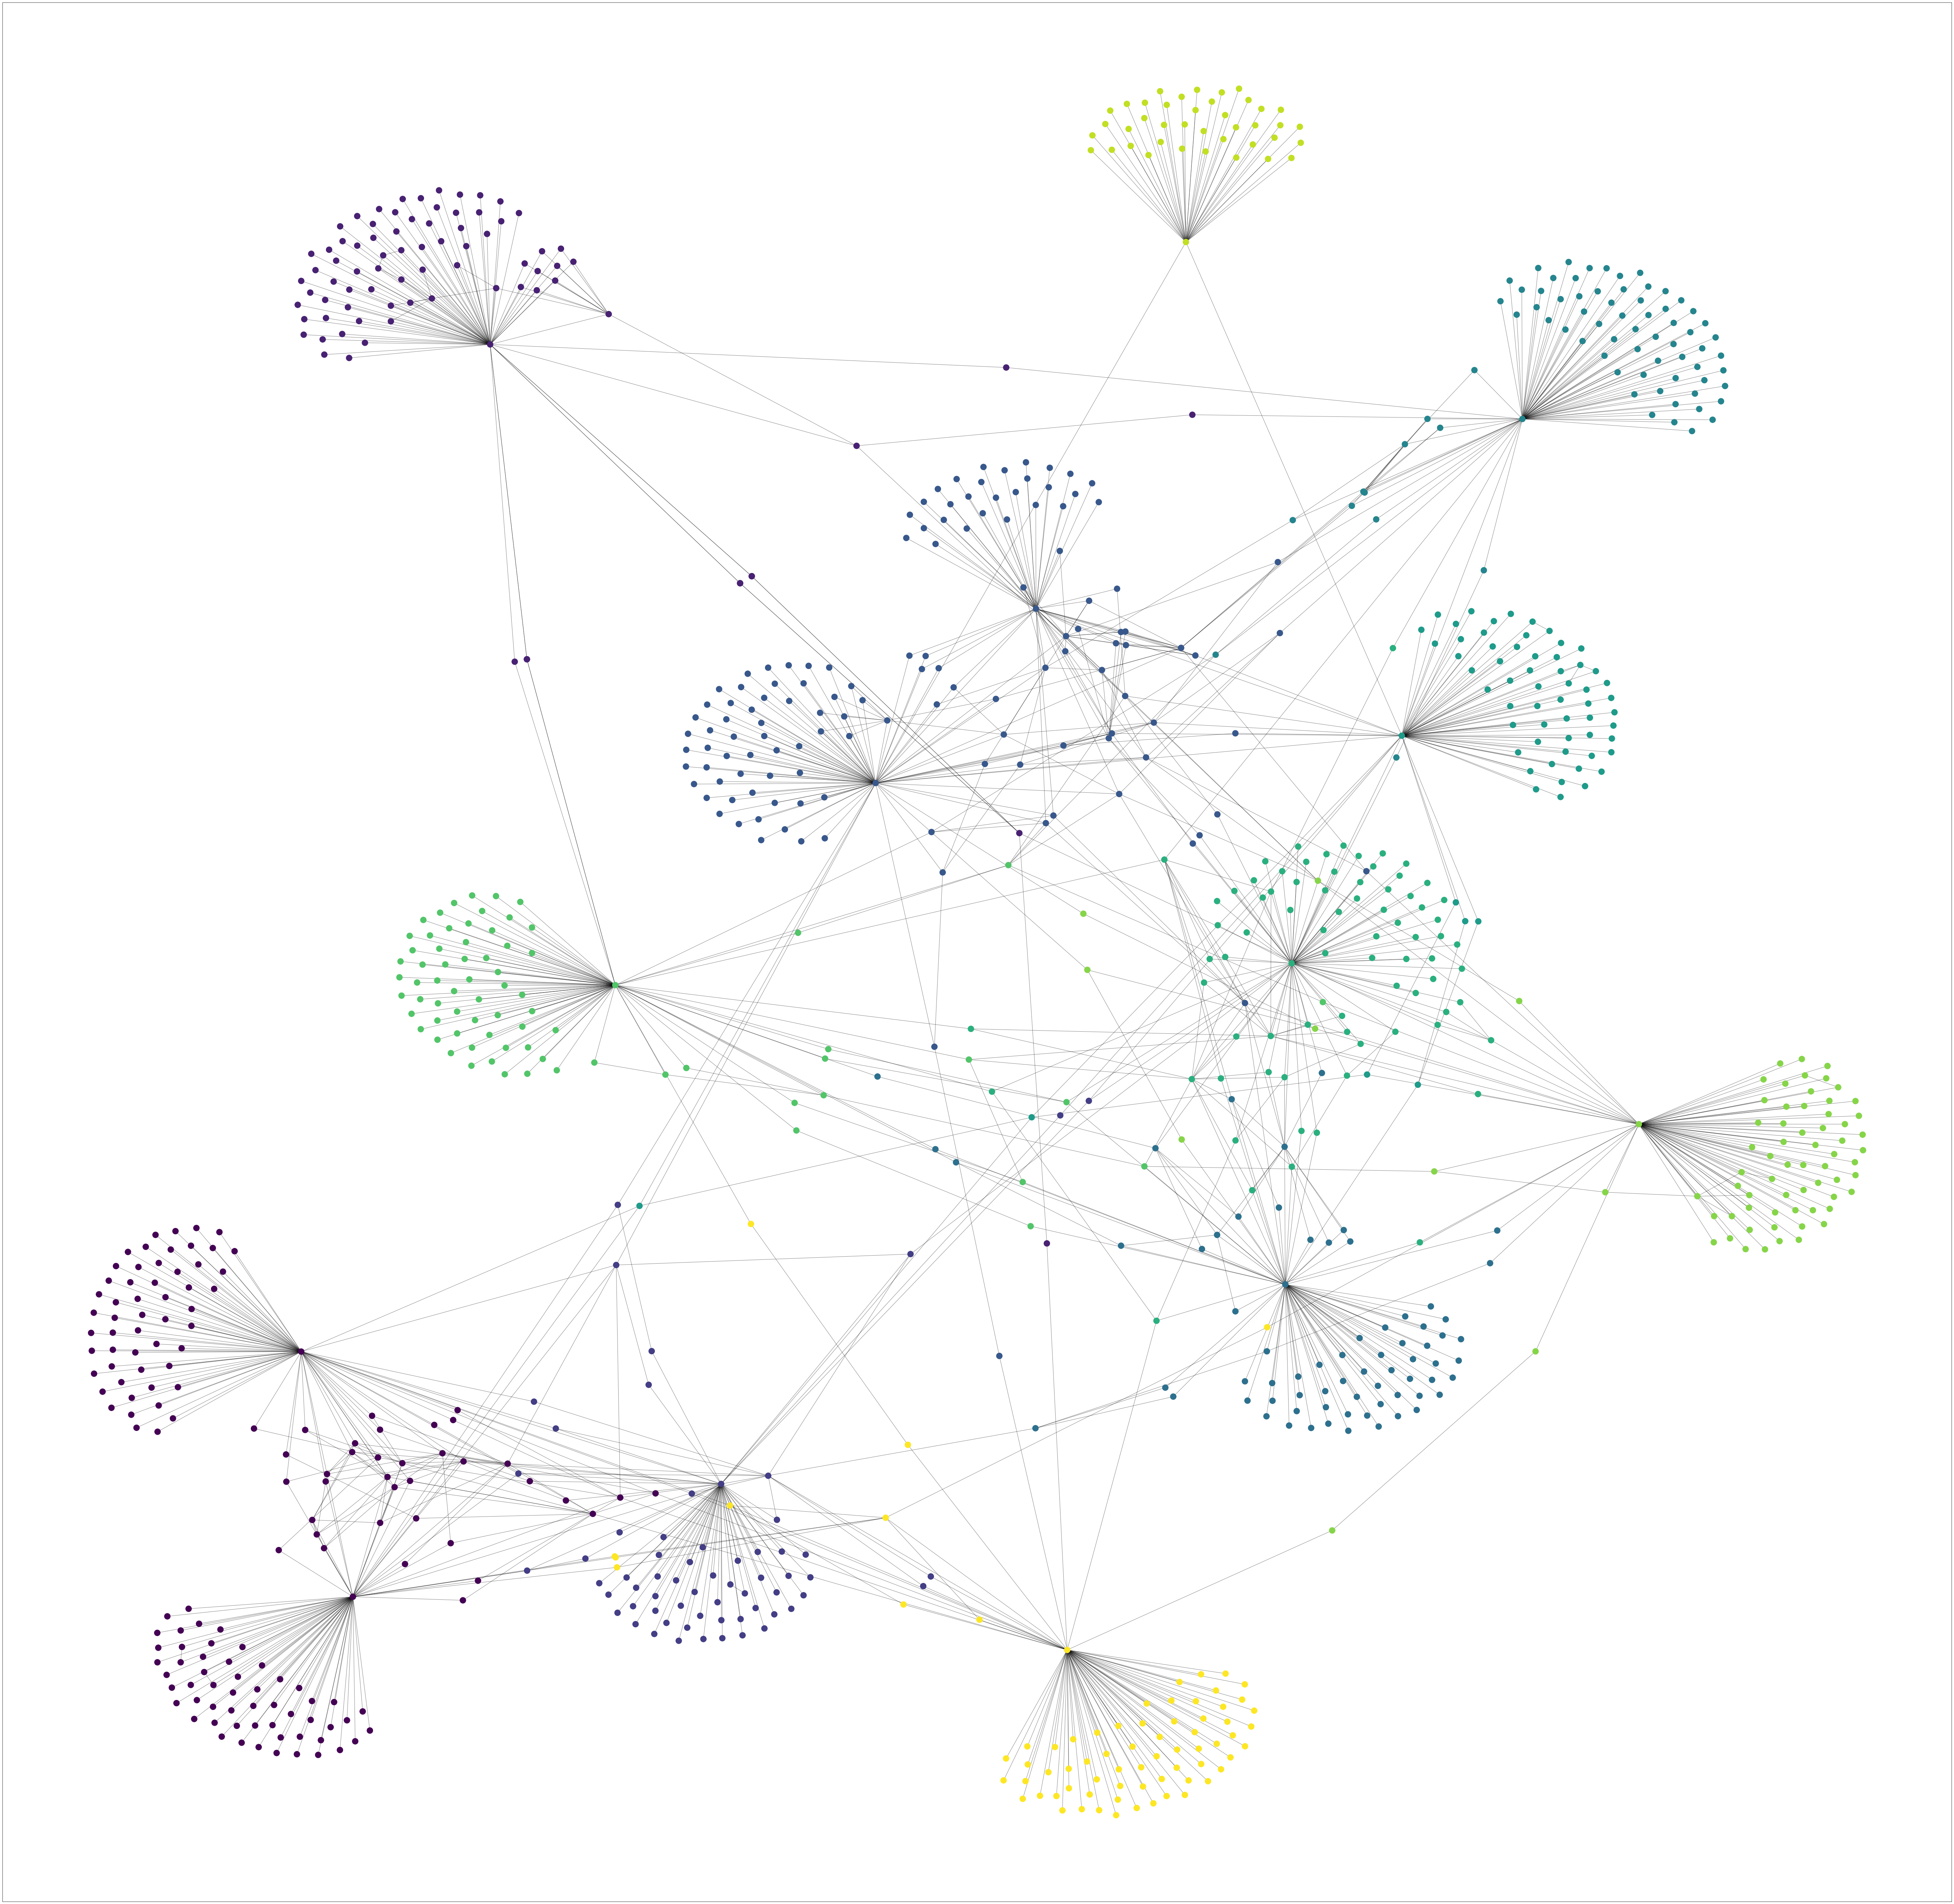

In [358]:
#communities
G = g.to_undirected()

#first compute the best partition
partition = community_louvain.best_partition(G)
print(community_louvain.modularity(partition, G))

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
plt.subplots(figsize =(100, 100))
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
#labels = nx.draw_networkx_labels(G, pos)
#plt.savefig('./follow_network_communities.pdf')
plt.savefig('./follow_network_communities_without_labels.pdf')

In [341]:
print("Number of communities: ", max(partition.values()) + 1)

Number of communities:  12


In [342]:
community_dict = {}

for key in partition.keys():
    if(partition[key] not in community_dict.keys()):
        community_dict[partition[key]] = [key]
    else:
        community_dict[partition[key]].append(key)

In [343]:
for key in community_dict.keys():
    print("Community: ", key)
    print("Members: ", community_dict[key])
    print("\n------------------------------------\n")

Community:  1
Members:  ['Rohit71297120', 'BJP4Bengal', 'promothosh', 'OmSolankiSen2', 'namoshreekaraa', 'Andri54527441', 'Ananyaspeaks', 'Sanjoy75795530', 'sanghi_comrade', 'Ahmed22Raj', 'AmarDutta5', 'SONUPINKOO', 'ankit_bjym1', 'SonuSingh8126', 'kpurohit1008', 'BikashK70621747', 'SatishMPujari3', 'ChandanaBauri_', 'SandeepPujhari', 'Amar26416724', 'Tapanmo99764305', 'AshishH47503036', 'Suman034491', 'Krishno5678', 'Ravindr13094023', 'RajeshK99397382', 'KapilNagesh', 'SkKaush69704765', 'PujaMon37361657', 'GurjarManmeet', 'lokraj99981784', 'VsbBabu', 'amitghosh76', 'SubhasYadaw', 'MdAHossain19', 'SGujar5', 'Shubham67126307', 'Paras92014635', 'fgTqFDa2lgmNNzO', 'Manisha74588592', 'SUMANDA29348599', 'mkraja8', 'DilipGhoshBJP', 'vickyyuvraaj091', 'Rupayan_Chakma9', 'nareshk50994873', 'DubrajPal', 'saikatb74028961', 'rkhirithik8', 'Swarupa06861295', 'BehalClw', 'sau_laltu', 'bhuta_darshan', 'SantraSurovita', 'MDSAMAD91330946', 'Surojit12221834', 'MishrRajmani', 'AlpanaDenre', 'PARASHURAMD

In [344]:
#plot degree distribution
def plot_deg_dist(G, dist_type='in'):
    if(dist_type == 'in'):
        degrees = G.in_degree() # list of tuples [(node id, in degree)]
    else:
        degrees = G.out_degree()
    values = {}
    for tup in degrees:
        if(tup[1] in values.keys()):
            values[tup[1]]+=1
        else:
            values[tup[1]]=1
    values = dict(sorted(values.items(), key=lambda item: item[0]))
    print(values)
    vals = [key for key in values.keys()]
    #print(in_vals)
    hist = [values[key] for key in values.keys()]
    
    final_vals = [] # for making more interpretable plots
    final_hist = []
    for key in values.keys():
        if(values[key] > 1 and key != 0):
            final_vals.append(key)
            final_hist.append(values[key])
            
    plt.figure() # you need to first do 'import pylab as plt' plt.grid(True)
    plt.plot(final_vals, final_hist)
    plt.ylabel('Number of nodes')
    plt.xlabel('Degree')
    if(dist_type == 'in'):
        plt.title('Follow Network : In-degree distribution') 
        plt.savefig('./follow_net_in_degree_distribution_final.pdf')
    else:
        plt.title('Follow Network Network : Out-degree distribution')
        plt.savefig('./follow_net_out_degree_distribution_final.pdf')

    plt.close()

In [345]:
#plot in-degree distribution
plot_deg_dist(g)
#plot out-degree distribution
plot_deg_dist(g, 'out')

{0: 473, 1: 330, 2: 74, 3: 25, 4: 21, 5: 9, 6: 8, 7: 6, 8: 2, 9: 5, 10: 4, 11: 1, 12: 4, 13: 1, 14: 2, 40: 5, 41: 2, 42: 2, 43: 2, 45: 1, 47: 2}
{0: 304, 1: 475, 2: 97, 3: 34, 4: 18, 5: 14, 6: 10, 7: 5, 8: 3, 9: 3, 10: 1, 11: 2, 18: 1, 24: 1, 31: 1, 39: 2, 40: 7, 42: 1}


In [354]:
#Centrality measures
bet_cen = nx.betweenness_centrality(g)
clos_cen = nx.closeness_centrality(g)
eig_cen = nx.eigenvector_centrality(g)
deg_cen = nx.degree_centrality(g)

def get_top_keys(dictionary, top):
    items = dictionary.items()
    items = sorted(items, reverse=True, key=lambda x: x[1]) 
    return map(lambda x: x[0], items[:top])

top_bet_cen = get_top_keys(bet_cen,10) 
top_clo_cen = get_top_keys(clos_cen,10) 
top_eig_cen = get_top_keys(eig_cen,10)
top_deg_cen = get_top_keys(deg_cen,10)

print("Top 10 Central Nodes: Degree centrality")
for node_id in top_deg_cen:
     print(node_id)
print('-----------------------------------------------')
print("Top 10 Central Nodes: Betweenness centrality")
for node_id in top_bet_cen:
     print(node_id)
print('-----------------------------------------------')
print("Top 10 Central Nodes: Closeness centrality")
for node_id in top_clo_cen:
     print(node_id)
print('-----------------------------------------------')
print("Top 10 Central Nodes: Eigen Vector centrality")
for node_id in top_eig_cen:
     print(node_id)

Top 10 Central Nodes: Degree centrality
AITCofficial
tathagata2
BJP4Bengal
DilipGhoshBJP
INCWestBengal
derekobrienmp
SitaramYechury
Sujan_Speak
cpimspeak
aimim_national
-----------------------------------------------
Top 10 Central Nodes: Betweenness centrality
tathagata2
AITCofficial
INCWestBengal
Sujan_Speak
MamataOfficial
cpimspeak
gagandeepseven
UtpalAdhikary14
ZartabKhan141
SuvenduWB
-----------------------------------------------
Top 10 Central Nodes: Closeness centrality
rashtrapatibhvn
INCWestBengal
jdhankhar1
mayukhrghosh
rajnathsingh
PMOIndia
tathagata2
Gautamdebmic
Indrani39664132
AITCofficial
-----------------------------------------------
Top 10 Central Nodes: Eigen Vector centrality
hiran_chatterji
krishmenon11
KhanSaumitra
RajibBanerjeeWB
NisithPramanik
iamharsh1000
amit0360
Andri54527441
RRRMovieeee
Saiyada10803839


In [355]:
#Clustering coefficient
print("Average Clustering Coefficient: ", nx.average_clustering(g))

Average Clustering Coefficient:  0.05878294846725918


In [356]:
print("Degree Assortativity Coefficient: ", nx.degree_assortativity_coefficient(g))

Degree Assortativity Coefficient:  -0.5972531034933202


In [349]:
print("VoteRank: ", nx.voterank(g, number_of_nodes=None))

VoteRank:  ['AITCofficial', 'BJP4Bengal', 'SitaramYechury', 'INCWestBengal', 'derekobrienmp', 'tathagata2', 'cpimspeak', 'aimim_national', 'Sujan_Speak', 'DilipGhoshBJP', 'MamataOfficial', 'SuvenduWB', 'SubhashiniAli', 'hiran_chatterji', 'DidiKeBolo', 'DharDipsita', 'kakoligdastidar', 'CPIMKerala', 'BanglarGorboMB', 'VineetPunia', 'ArjunsinghWB', 'imAkbarOwaisi', 'imShaukatAli', 'KhanSaumitra', 'Gautamdebmic', 'Drsubhassarkar', 'AITC_Parliament', 'laluprasadrjd', 'ZartabKhan141', 'YogiBharosa', 'Dipankar_cpiml', 'ClassStressed', 'krishmenon11', 'egiye_bangla', 'ShahnawazAIMIM_', 'shatarupghosh', 'MeghnaMahapatra', 'AnanyaB11093354', 'MdSahid76410172', 'DrShashiPanja', 'VishalA01812262', 'Yash_Dasgupta', 'BJP4Puducherry', 'swapan55', 'ArunSinghbjp', 'shivprakashbjp', 'myslf_soham', 'vijayanpinarayi', 'Roshanjnu', 'SushantSin', 'MyAnandaBazar', 'RoshanLalBittu', 'SreyashiDey', 'NilanjanDas_', 'CPKolkata', 'AmlanTekam', 'ajith_citizen', 'Harishmula3', 'Remya25999704', 'srinagarhi', 'itspc

In [350]:
pagerank_dict = nx.pagerank(g, alpha=0.9)
pagerank_dict = dict( sorted(pagerank_dict.items(), key=operator.itemgetter(1),reverse=True))
print("PageRank: ", pagerank_dict)

PageRank:  {'ClassStressed': 0.022598461970551893, 'tathagata2': 0.020130847996124645, 'AITCofficial': 0.017094265065478034, 'MamataOfficial': 0.015921229539549338, 'DilipGhoshBJP': 0.01470813453340136, 'INCWestBengal': 0.014548782247302536, 'SuvenduWB': 0.013595228864029243, 'Sujan_Speak': 0.012659231718155271, 'derekobrienmp': 0.012367890657032263, 'BJP4Bengal': 0.011850154027531883, 'DidiKeBolo': 0.01170433213335785, 'cpimspeak': 0.01167209692008635, 'SitaramYechury': 0.010765199441560184, 'aimim_national': 0.010606208079751845, 'krishmenon11': 0.010517649912554116, 'YogiBharosa': 0.01029846061737371, 'MahuaMoitra': 0.010199636818700846, 'ZartabKhan141': 0.008602961198889527, 'AnanyaB11093354': 0.008391012276281678, 'AliFokhir': 0.008137712576565316, 'amit0360': 0.007618294900809317, 'iam_aryan18': 0.007582753911004476, 'KhanSaumitra': 0.007546277275994126, 'kakoligdastidar': 0.007375847578203537, 'AmlanTekam': 0.006549116548249804, 'iamharsh1000': 0.006353633785626717, 'surjasakher

In [351]:
#top-k page ranks
k = 20
count = 0
print("Top",k,"PageRanks: \n")
for key in pagerank_dict.keys():
    print(key)
    if count == k:
        break
    count+=1

Top 20 PageRanks: 

ClassStressed
tathagata2
AITCofficial
MamataOfficial
DilipGhoshBJP
INCWestBengal
SuvenduWB
Sujan_Speak
derekobrienmp
BJP4Bengal
DidiKeBolo
cpimspeak
SitaramYechury
aimim_national
krishmenon11
YogiBharosa
MahuaMoitra
ZartabKhan141
AnanyaB11093354
AliFokhir
amit0360


In [352]:
sccs = nx.strongly_connected_components(g)
num_scc=0
for x in sccs:
    print(x)
    num_scc+=1
print("Number of SCCs: ", num_scc)


{'HISTORY'}
{'patra_amiya'}
{'DrAshokDhawale'}
{'up_cpim'}
{'kkragesh'}
{'GANASHAKTI1'}
{'TripuraCPIM'}
{'awadheshcpim'}
{'ElamaramKareem_'}
{'prabhleen_kaurr'}
{'HariprasadBK2'}
{'nabilajamal_'}
{'pawanbansal_chd'}
{'INC_Television'}
{'reshma_alam9'}
{'toi_pDasgupta'}
{'Itsanindita'}
{'srivatsayb'}
{'pandey_amrish'}
{'msgpahujaa'}
{'iSamiakapoor'}
{'RSBaliHP'}
{'SharadYadavMP'}
{'yadavtejashwi'}
{'India_Resists'}
{'PreetiChoudhry'}
{'NilotpalBasu1'}
{'Suparna_Singh'}
{'PrannoyRoyNDTV'}
{'vikramchandra'}
{'soniandtv'}
{'rahulkanwal'}
{'aroonpurie'}
{'bhupendrachaube'}
{'rohini_sgh'}
{'larmbrust'}
{'mitalisaran'}
{'samjawed65'}
{'watchthestate'}
{'PradyotManikya'}
{'MrSamratX'}
{'NuraRadha'}
{'MickyGupta84'}
{'KoushaniMukher1'}
{'sdo_ojha'}
{'IndiaToday'}
{'TheKaranMenon'}
{'thecaravanindia'}
{'mandeeppunia1'}
{'DrRijuDutta_TMC'}
{'em_basu'}
{'iamsaaurav'}
{'sonaliranade'}
{'vinodjose'}
{'onlineGhosh'}
{'BenDoBrown'}
{'AanyaOBrien'}
{'saahilmenghani'}
{'aitcpriyanka'}
{'KunalGhoshAgain'

In [353]:
wccs = nx.weakly_connected_components(g)
print("Number of WCCs: ", num_wcc)

Number of WCCs:  2


In [364]:
import networkx.algorithms.community.centrality as comm
import itertools
comp = comm.girvan_newman(g)
for communities in itertools.islice(comp, k):
    print("k: ", k)
    print("Number of communities, ", len(communities))
    print(tuple(sorted(c) for c in communities))
    print("\n--------------------------------\n")

k:  20
Number of communities,  2
(['Aabhas24', 'Aadhiraspeaks', 'AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AloPal', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'ArupCha18805156', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BadhanDutta10', 'BehalClw', 'BikashK70621747', 'BjpLokenath', 'BrahmanRahul99', 'Brendan_Kumar', 'BuddyBjp', 'Catwoman991', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DhananjayParkhe', 'Dhruv86424634', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSJaishankar', 'DrSukantaMajum1', 'Drsubhassarkar', 'DubrajPal', 'DukhiramHazra', 'EngineringVids', 'FinMinIndia', 'GIATANJALI1', 'GhoraiPayel', 'GinodiaRajesh', 'GurjarManmeet', 'HAPPYKHANDELWA4', 'HISTORY', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda

k:  20
Number of communities,  3
(['Aabhas24', 'Aadhiraspeaks', 'AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AloPal', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'ArupCha18805156', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BadhanDutta10', 'BehalClw', 'BikashK70621747', 'BjpLokenath', 'BrahmanRahul99', 'Brendan_Kumar', 'BuddyBjp', 'Catwoman991', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DhananjayParkhe', 'Dhruv86424634', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSJaishankar', 'DrSukantaMajum1', 'Drsubhassarkar', 'DubrajPal', 'DukhiramHazra', 'EngineringVids', 'FinMinIndia', 'GIATANJALI1', 'GhoraiPayel', 'GinodiaRajesh', 'GurjarManmeet', 'HAPPYKHANDELWA4', 'HISTORY', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda

k:  20
Number of communities,  4
(['Aabhas24', 'Aadhiraspeaks', 'AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AloPal', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'ArupCha18805156', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BadhanDutta10', 'BehalClw', 'BikashK70621747', 'BjpLokenath', 'BrahmanRahul99', 'Brendan_Kumar', 'BuddyBjp', 'Catwoman991', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DhananjayParkhe', 'Dhruv86424634', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSJaishankar', 'DrSukantaMajum1', 'Drsubhassarkar', 'DubrajPal', 'DukhiramHazra', 'EngineringVids', 'FinMinIndia', 'GIATANJALI1', 'GhoraiPayel', 'GinodiaRajesh', 'GurjarManmeet', 'HAPPYKHANDELWA4', 'HISTORY', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda

k:  20
Number of communities,  5
(['Aabhas24', 'Aadhiraspeaks', 'AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AloPal', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'ArupCha18805156', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BadhanDutta10', 'BehalClw', 'BikashK70621747', 'BjpLokenath', 'BrahmanRahul99', 'Brendan_Kumar', 'BuddyBjp', 'Catwoman991', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DhananjayParkhe', 'Dhruv86424634', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSJaishankar', 'DrSukantaMajum1', 'Drsubhassarkar', 'DubrajPal', 'DukhiramHazra', 'EngineringVids', 'FinMinIndia', 'GIATANJALI1', 'GhoraiPayel', 'GinodiaRajesh', 'GurjarManmeet', 'HAPPYKHANDELWA4', 'HISTORY', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda

k:  20
Number of communities,  6
(['Aabhas24', 'Aadhiraspeaks', 'AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AloPal', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'ArupCha18805156', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BadhanDutta10', 'BehalClw', 'BikashK70621747', 'BjpLokenath', 'BrahmanRahul99', 'Brendan_Kumar', 'BuddyBjp', 'Catwoman991', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DhananjayParkhe', 'Dhruv86424634', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSJaishankar', 'DrSukantaMajum1', 'Drsubhassarkar', 'DubrajPal', 'DukhiramHazra', 'EngineringVids', 'FinMinIndia', 'GIATANJALI1', 'GhoraiPayel', 'GinodiaRajesh', 'GurjarManmeet', 'HAPPYKHANDELWA4', 'HISTORY', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda

k:  20
Number of communities,  7
(['AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'BrahmanRahul99', 'BuddyBjp', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda', 'Jamirul16460246', 'JamsherNavi3', 'JayantaRoyJPG', 'JyotirmayBJP', 'KafirPawanKumar', 'KailashOnline', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'KunalSingh_BjP', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India', 

k:  20
Number of communities,  8
(['AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'BrahmanRahul99', 'BuddyBjp', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda', 'Jamirul16460246', 'JamsherNavi3', 'JayantaRoyJPG', 'JyotirmayBJP', 'KafirPawanKumar', 'KailashOnline', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'KunalSingh_BjP', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India', 

k:  20
Number of communities,  9
(['AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'BrahmanRahul99', 'BuddyBjp', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda', 'Jamirul16460246', 'JamsherNavi3', 'JayantaRoyJPG', 'JyotirmayBJP', 'KafirPawanKumar', 'KailashOnline', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'KunalSingh_BjP', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India', 

k:  20
Number of communities,  10
(['AbbayChakrabor1', 'AbhishekDurgCG', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmitShah', 'Amitava_BJP', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'ArunSinghbjp', 'AshishH47503036', 'BJP4Bengal', 'BJP4India', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'BrahmanRahul99', 'BuddyBjp', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'HMOIndia', 'HumorHindustani', 'IAMdEBAPRATEEM', 'ICMRDELHI', 'Indiametdept', 'IndradeoP', 'JPNadda', 'Jamirul16460246', 'JamsherNavi3', 'JayantaRoyJPG', 'JyotirmayBJP', 'KafirPawanKumar', 'KailashOnline', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'KunalSingh_BjP', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India',

k:  20
Number of communities,  11
(['AbbayChakrabor1', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'ICMRDELHI', 'Indiametdept', 'JPNadda', 'Jamirul16460246', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India', 'MOFPI_GOI', 'MPGirishBapat', 'Manisha74588592', 'MdAHossain19', 'MiRBasheeR6', 'MinOfCultureGoI', 'MishrRajmani', 'MundaArjun', 'NeerajZimba', 'NisithPramanik', 'OmSolankiSen2', 'PARASHURAMDAS7', 'PMuralidharRao', 'Paayel_12353', 'Pan

k:  20
Number of communities,  12
(['AbbayChakrabor1', 'AgriGoI', 'Ahmed22Raj', 'AlpanaDenre', 'Amar26416724', 'AmarDutta5', 'AmlanTekam', 'Ananyaspeaks', 'Andri54527441', 'ArjunsinghWB', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BJPMM4Bengal', 'BehalClw', 'BikashK70621747', 'ChandanaBauri_', 'ClassStressed', 'DDKisanChannel', 'Devendr68140758', 'DilipGhoshBJP', 'DilipGhoshOff', 'DinTri', 'DjPindra', 'DrRPNishank', 'DrSukantaMajum1', 'DubrajPal', 'DukhiramHazra', 'FinMinIndia', 'GhoraiPayel', 'GurjarManmeet', 'ICMRDELHI', 'Indiametdept', 'JPNadda', 'Jamirul16460246', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KhanSaumitra', 'KirronKherBJP', 'KishorBarmanBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'MDSAMAD91330946', 'MIB_India', 'MOFPI_GOI', 'MPGirishBapat', 'Manisha74588592', 'MdAHossain19', 'MiRBasheeR6', 'MinOfCultureGoI', 'MishrRajmani', 'MundaArjun', 'NeerajZimba', 'NisithPramanik', 'OmSolankiSen2', 'PARASHURAMDAS7', 'PMuralidharRao', 'Paayel_12353', 'Pan

k:  20
Number of communities,  13
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  14
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  15
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  16
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  17
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  18
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  19
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  20
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh

k:  20
Number of communities,  21
(['Ahmed22Raj', 'Amar26416724', 'AmarDutta5', 'Ananyaspeaks', 'AshishH47503036', 'BJP4Bengal', 'BJP4Puducherry', 'BikashK70621747', 'ChandanaBauri_', 'DrSukantaMajum1', 'GurjarManmeet', 'JayantaRoyJPG', 'JyotirmayBJP', 'KapilNagesh', 'KirronKherBJP', 'Krishno5678', 'KunalDe60830320', 'LKBajpaiBJP', 'Manisha74588592', 'MdAHossain19', 'MinOfCultureGoI', 'NeerajZimba', 'OmSolankiSen2', 'Paras92014635', 'PrajwalBusta', 'PujaMon37361657', 'RajeshK99397382', 'RajuBistaBJP', 'Ravindr13094023', 'Rohit71297120', 'SDUTTAOFFICIAL', 'SGujar5', 'SONUPINKOO', 'SUMANDA29348599', 'SandeepPujhari', 'Sanjoy75795530', 'Shubham67126307', 'SkKaush69704765', 'SonuSingh8126', 'SubhasYadaw', 'TajinderBagga', 'Tapanmo99764305', 'VasudevDevnani', 'VsbBabu', 'YogiBharosa', 'ahir_hansraj', 'amitghosh76', 'ankit_bjym1', 'dayem_hossin', 'drnarottammisra', 'fgTqFDa2lgmNNzO', 'hembram_kunar', 'johnbarlabjp', 'kpmaurya1', 'kpurohit1008', 'lokraj99981784', 'mansukhmandviya', 'mayukhrgh